## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"),
                      index_col = "Timestamp",
                      parse_dates = True,
                      infer_datetime_format = True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"),
                      index_col = "Timestamp",
                      parse_dates = True,
                      infer_datetime_format = True)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp = bitstamp.dropna()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $

#Checking for date type for columns in the data frame
#bitstamp.dtypes

#Using str.replace to remove all $ symbols in the Close column, and re-checking data frame to see if $ was removed
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()

#Checking to see if duplicates were dropped
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame

#Revoming all NaN values from the dataframe
coinbase = coinbase.dropna()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


In [11]:
#Removing all $ symbols from the dataframe
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")

#Checking to see the $ symbols were removed from the dataframe
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [12]:
# Convert the Close data type to a float
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()

#Checking to see if duplicates were dropped
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54
2015-12-31 19:06:00,432.52


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,1.347772e+06
mean,4.503924e+03
std,3.956149e+03
min,1.500000e+00
25%,7.888900e+02
50%,3.788990e+03
75%,6.929443e+03
max,1.966575e+04


In [17]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,1.549523e+06
mean,4.091926e+03
std,3.913501e+03
min,6.000000e-02
25%,6.754000e+02
50%,2.710730e+03
75%,6.593500e+03
max,1.989199e+04


<AxesSubplot:title={'center':'Bitstamp Closing Prices - All Time'}, xlabel='Timestamp'>

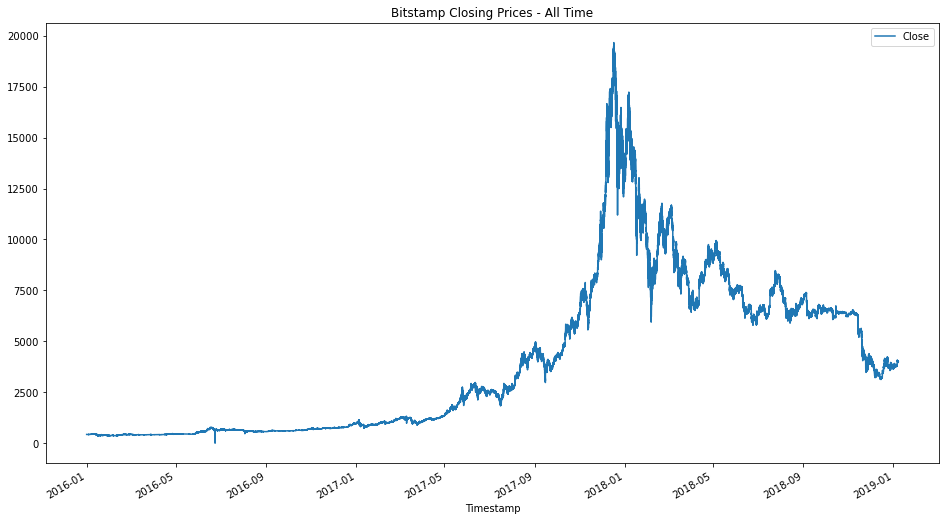

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend= True, figsize = (16,9), title = "Bitstamp Closing Prices - All Time", label = "Bitstamp")

<AxesSubplot:title={'center':'Coinbase Closing Prices - All Time'}, xlabel='Timestamp'>

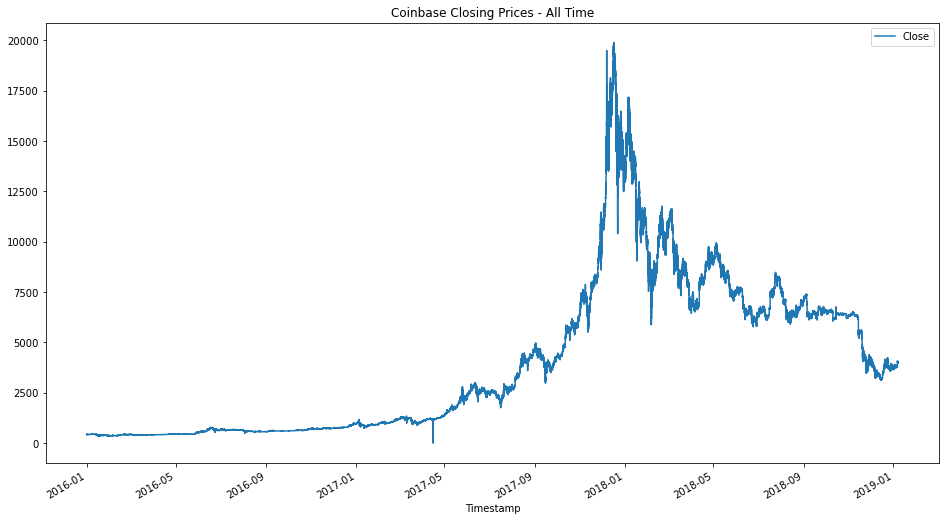

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend= True, figsize = (16,9), title = "Coinbase Closing Prices - All Time", label = "Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

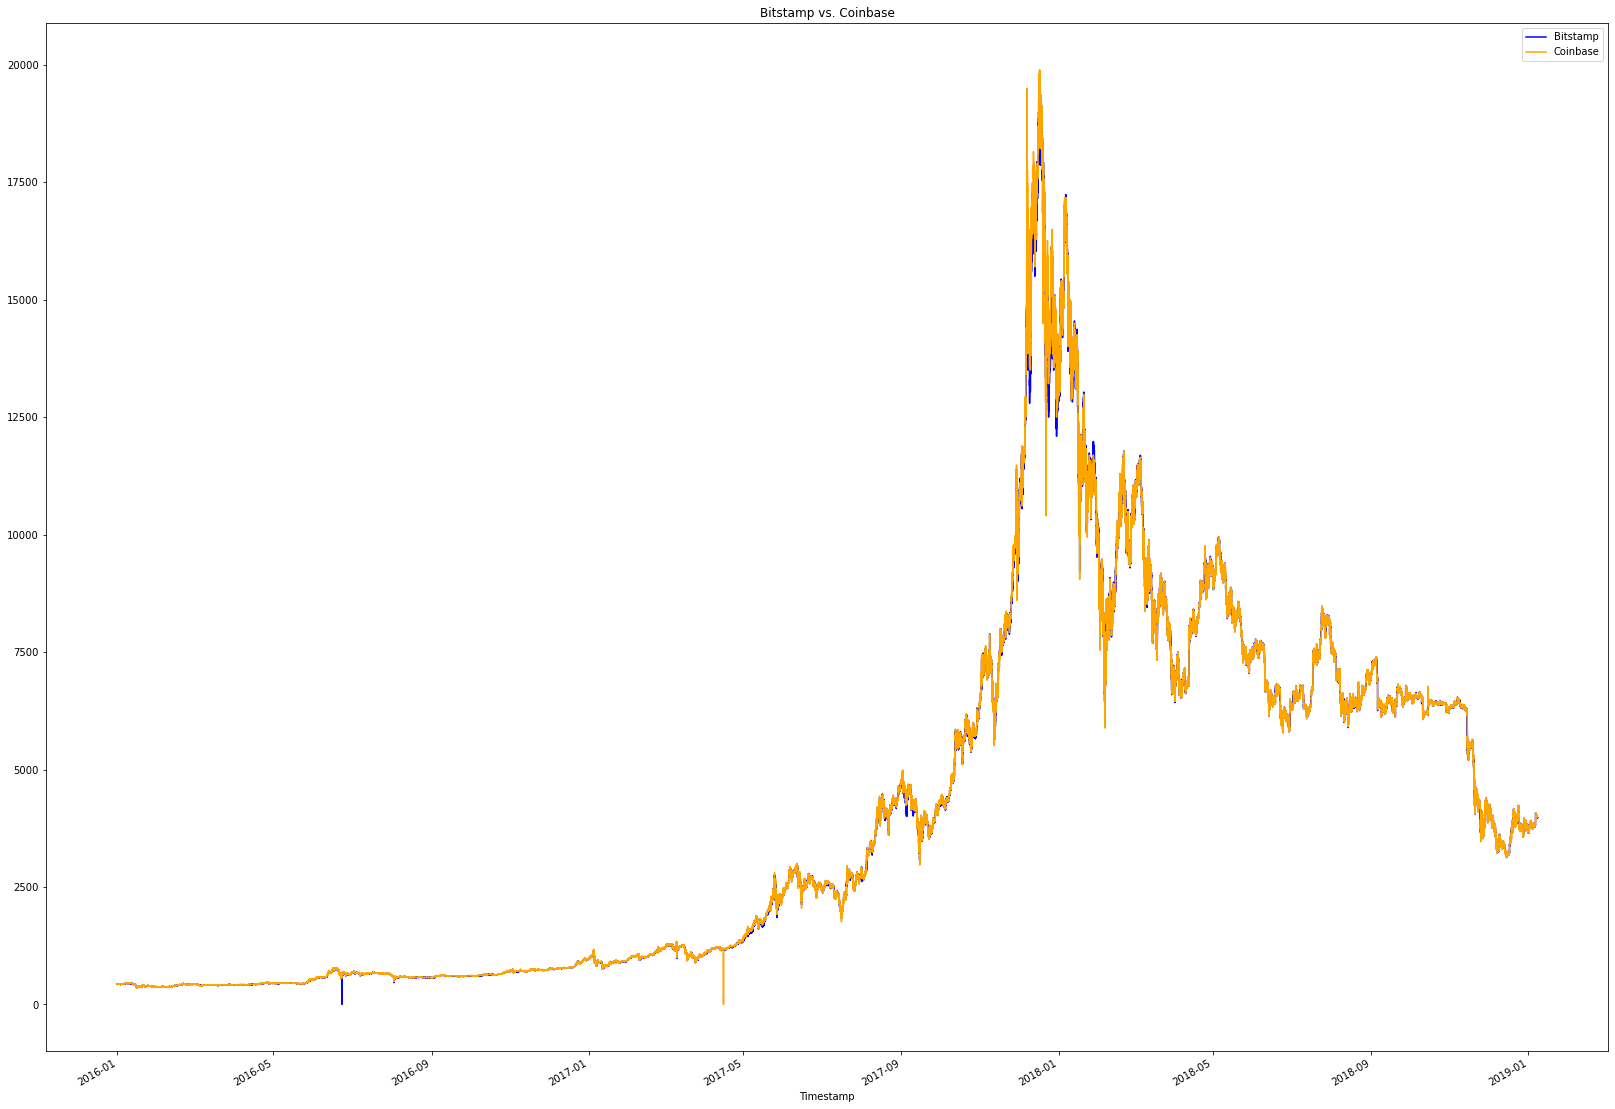

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")



<AxesSubplot:title={'center':'Bitstamp vs. Coinbase (June 2016)'}, xlabel='Timestamp'>

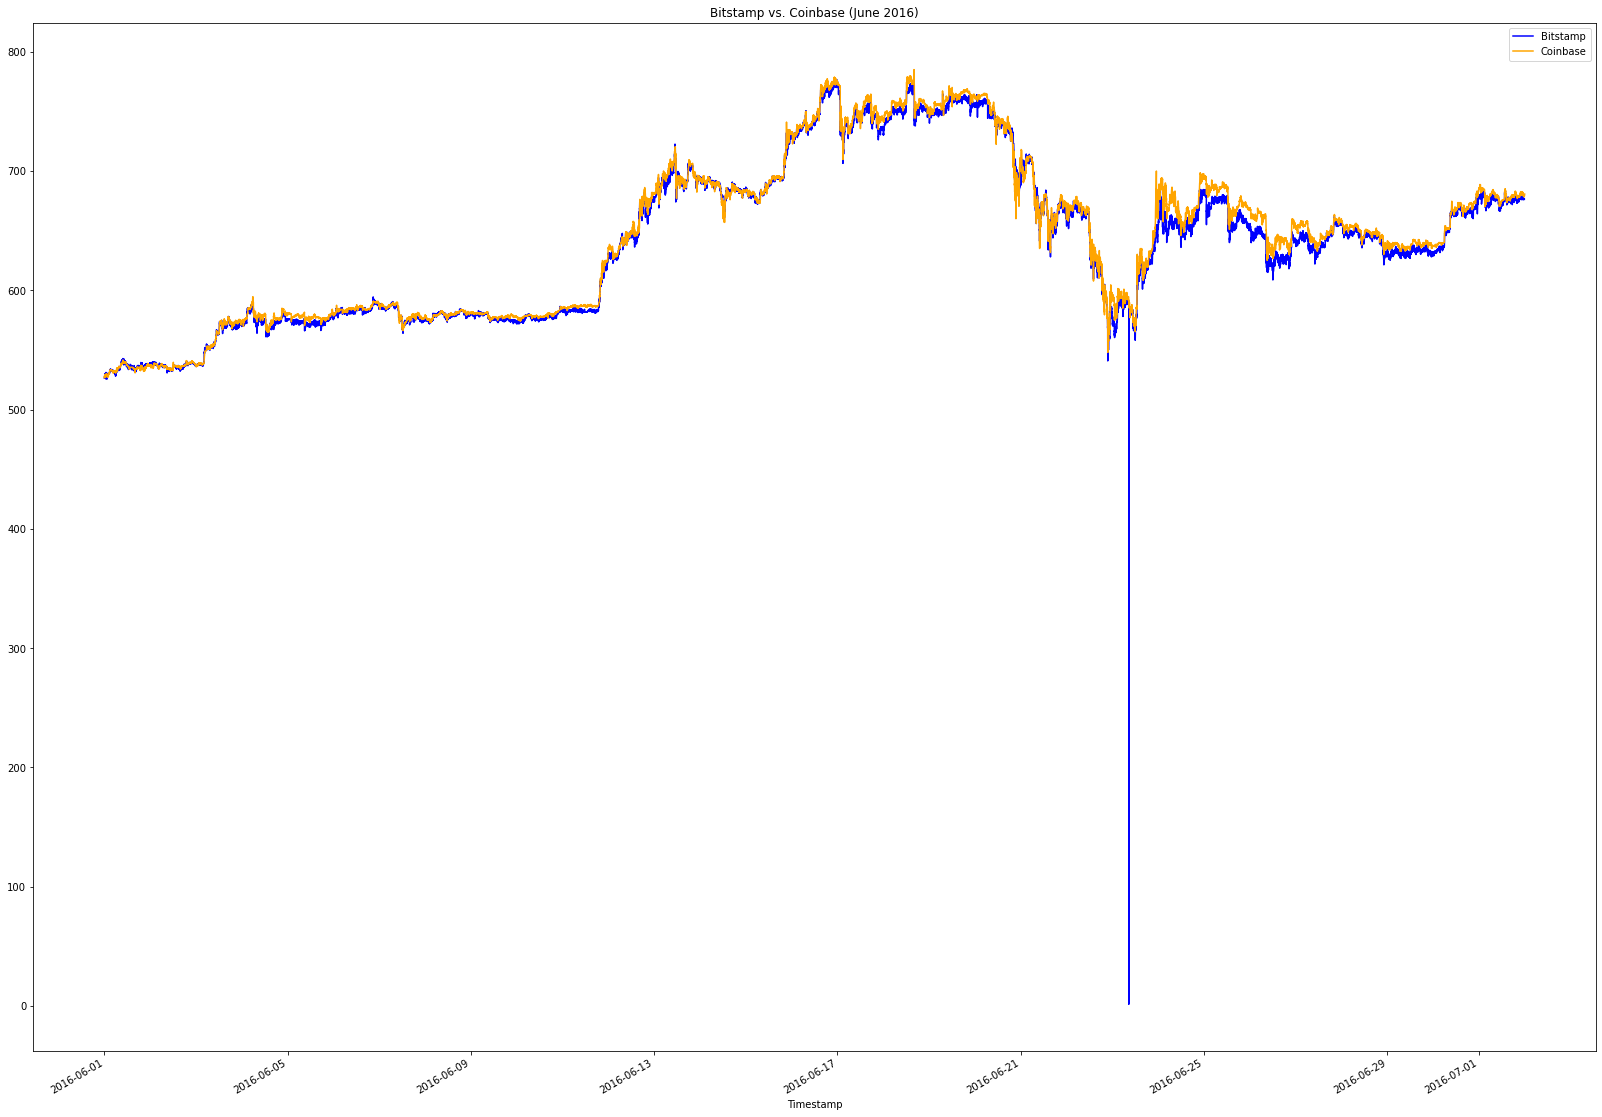

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc["2016-06-01":"2016-07-01"].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase (June 2016)", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].loc["2016-06-01":"2016-07-01"].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase (June 2018)'}, xlabel='Timestamp'>

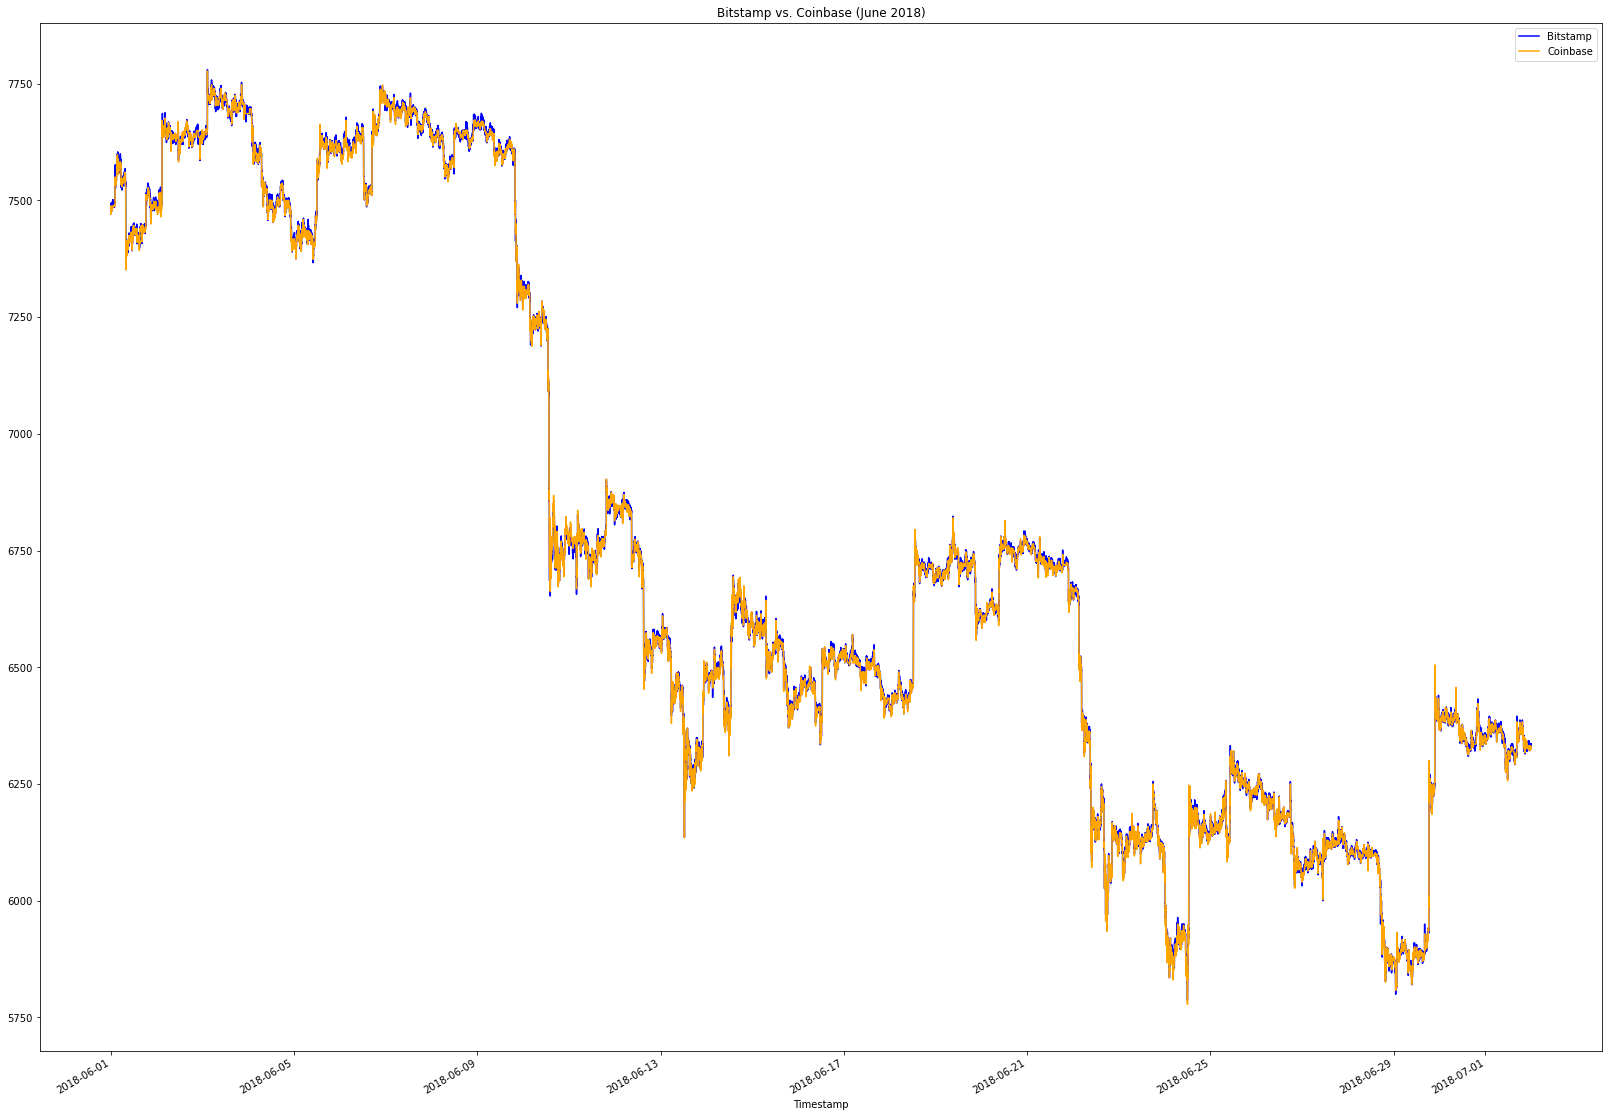

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc["2018-06-01":"2018-07-01"].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase (June 2018)", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].loc["2018-06-01":"2018-07-01"].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based upon the visualizations of the 2016 and 2018 period, there seems to be little degree of spread change as time has progressed.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase (June 2, 2016)'}, xlabel='Timestamp'>

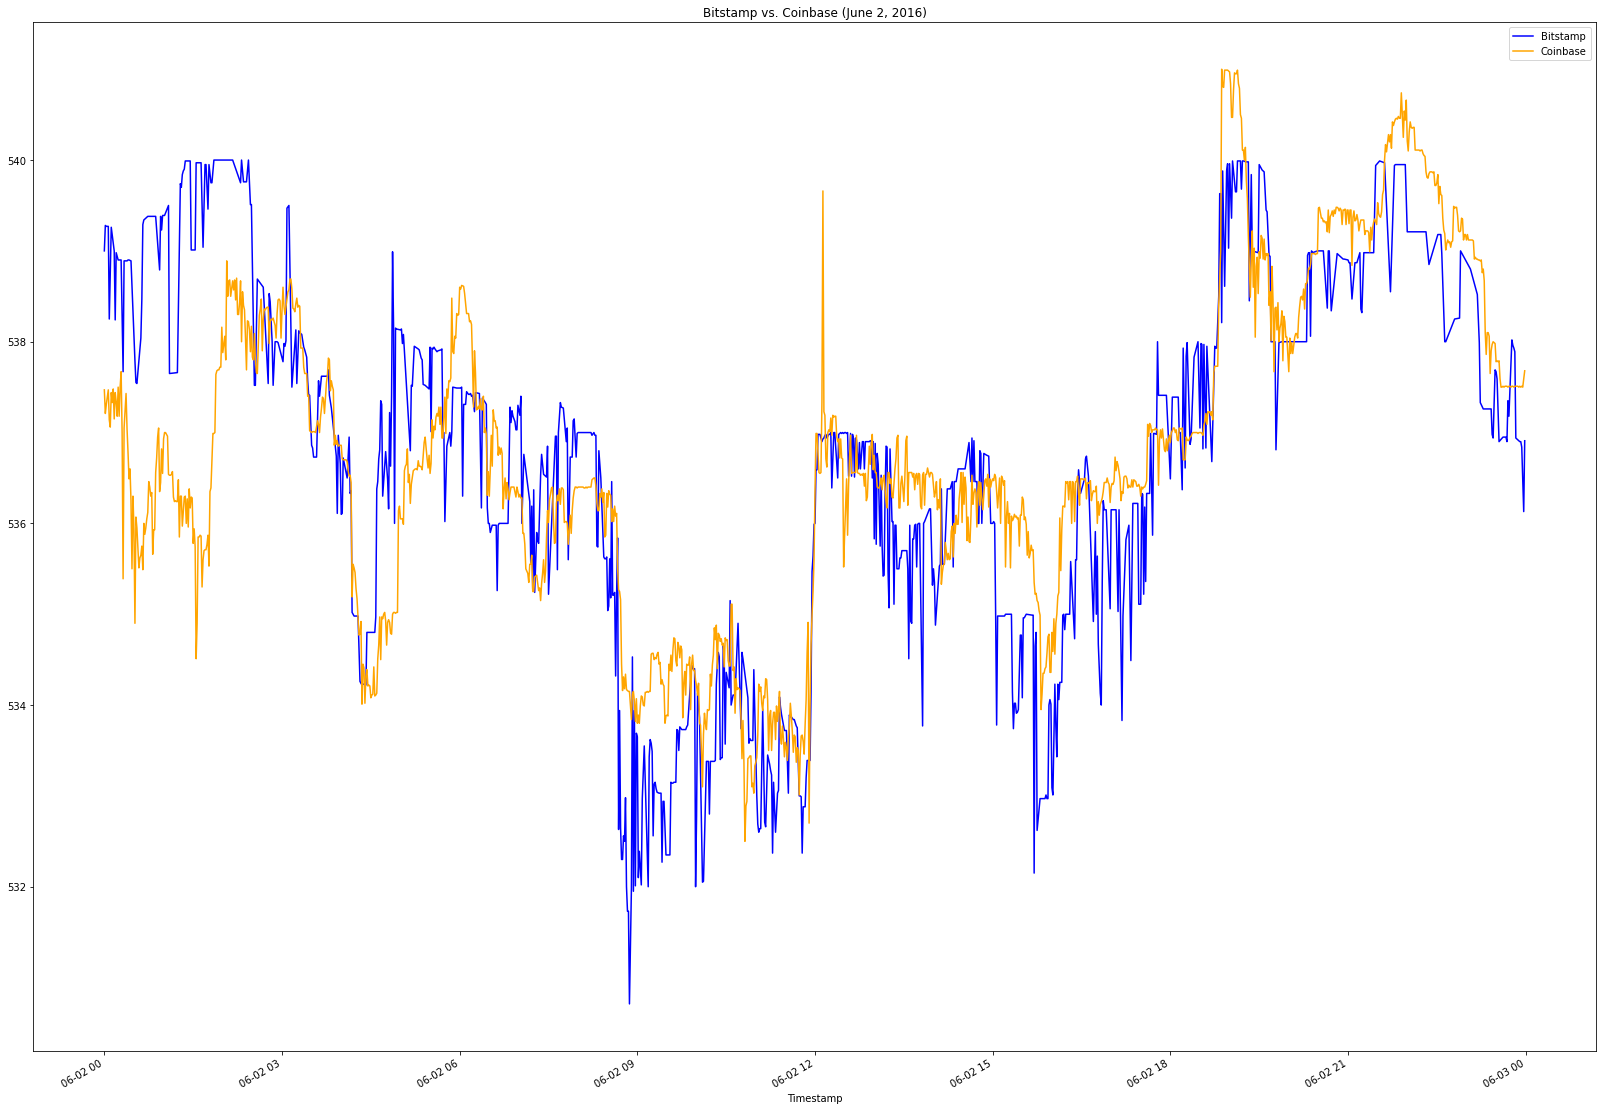

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc["2016-06-02"].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase (June 2, 2016)", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].loc["2016-06-02"].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc["2016-06-02"] - bitstamp_sliced['Close'].loc["2016-06-02"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    870.000000
mean       0.092517
std        1.215050
min       -5.460000
25%       -0.480000
50%        0.240000
75%        0.855000
max        3.440000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp/Coinbase Arbitrage Spread 6-2-2016'}>

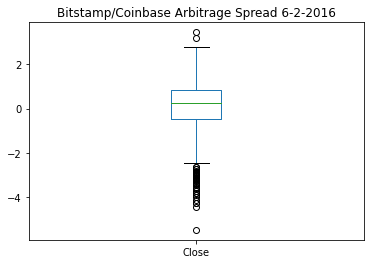

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot

arbitrage_spread_early.plot(kind = "box", title = "Bitstamp/Coinbase Arbitrage Spread 6-2-2016")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase (June 12, 2017)'}, xlabel='Timestamp'>

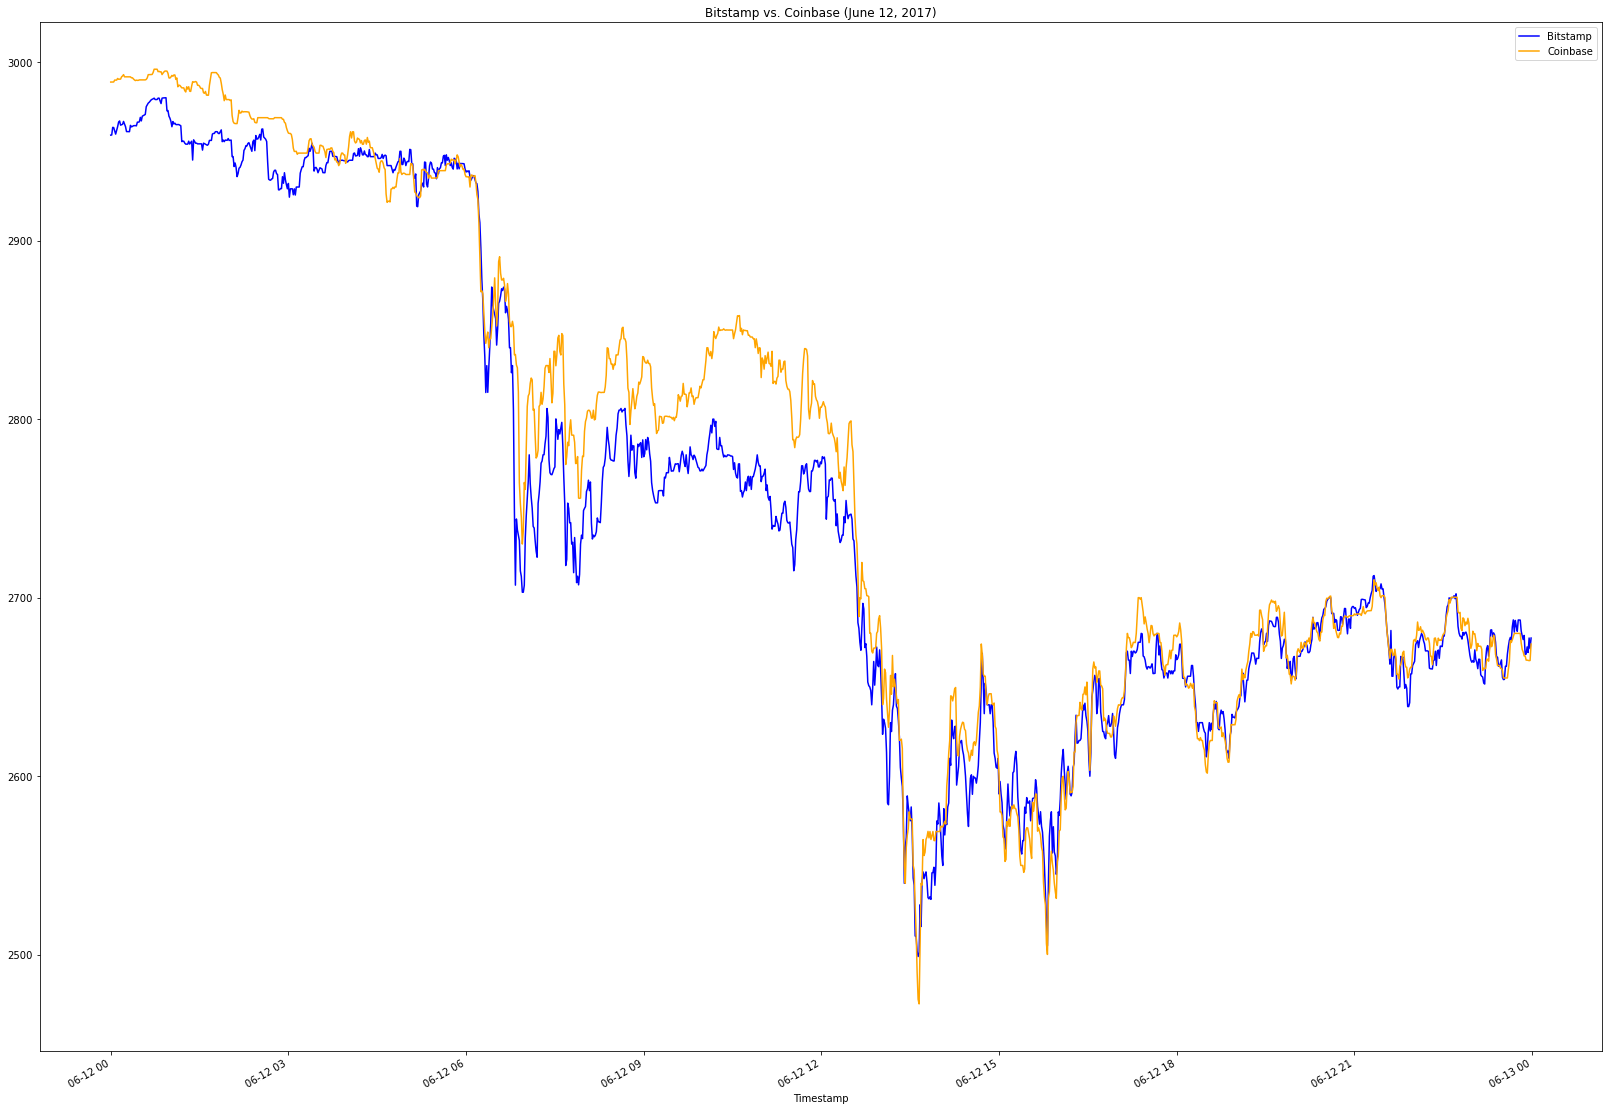

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc["2017-06-12"].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase (June 12, 2017)", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].loc["2017-06-12"].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")

In [27]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc["2017-06-12"] - bitstamp_sliced['Close'].loc["2017-06-12"]

# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()

count    1412.000000
mean       17.980241
std        24.480796
min       -34.670000
25%        -0.505000
50%        11.980000
75%        31.630000
max       129.190000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp/Coinbase Arbitrage Spread 6-12-2017'}>

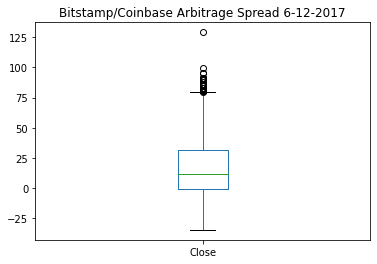

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(kind = "box", title = "Bitstamp/Coinbase Arbitrage Spread 6-12-2017")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase (June 25, 2018)'}, xlabel='Timestamp'>

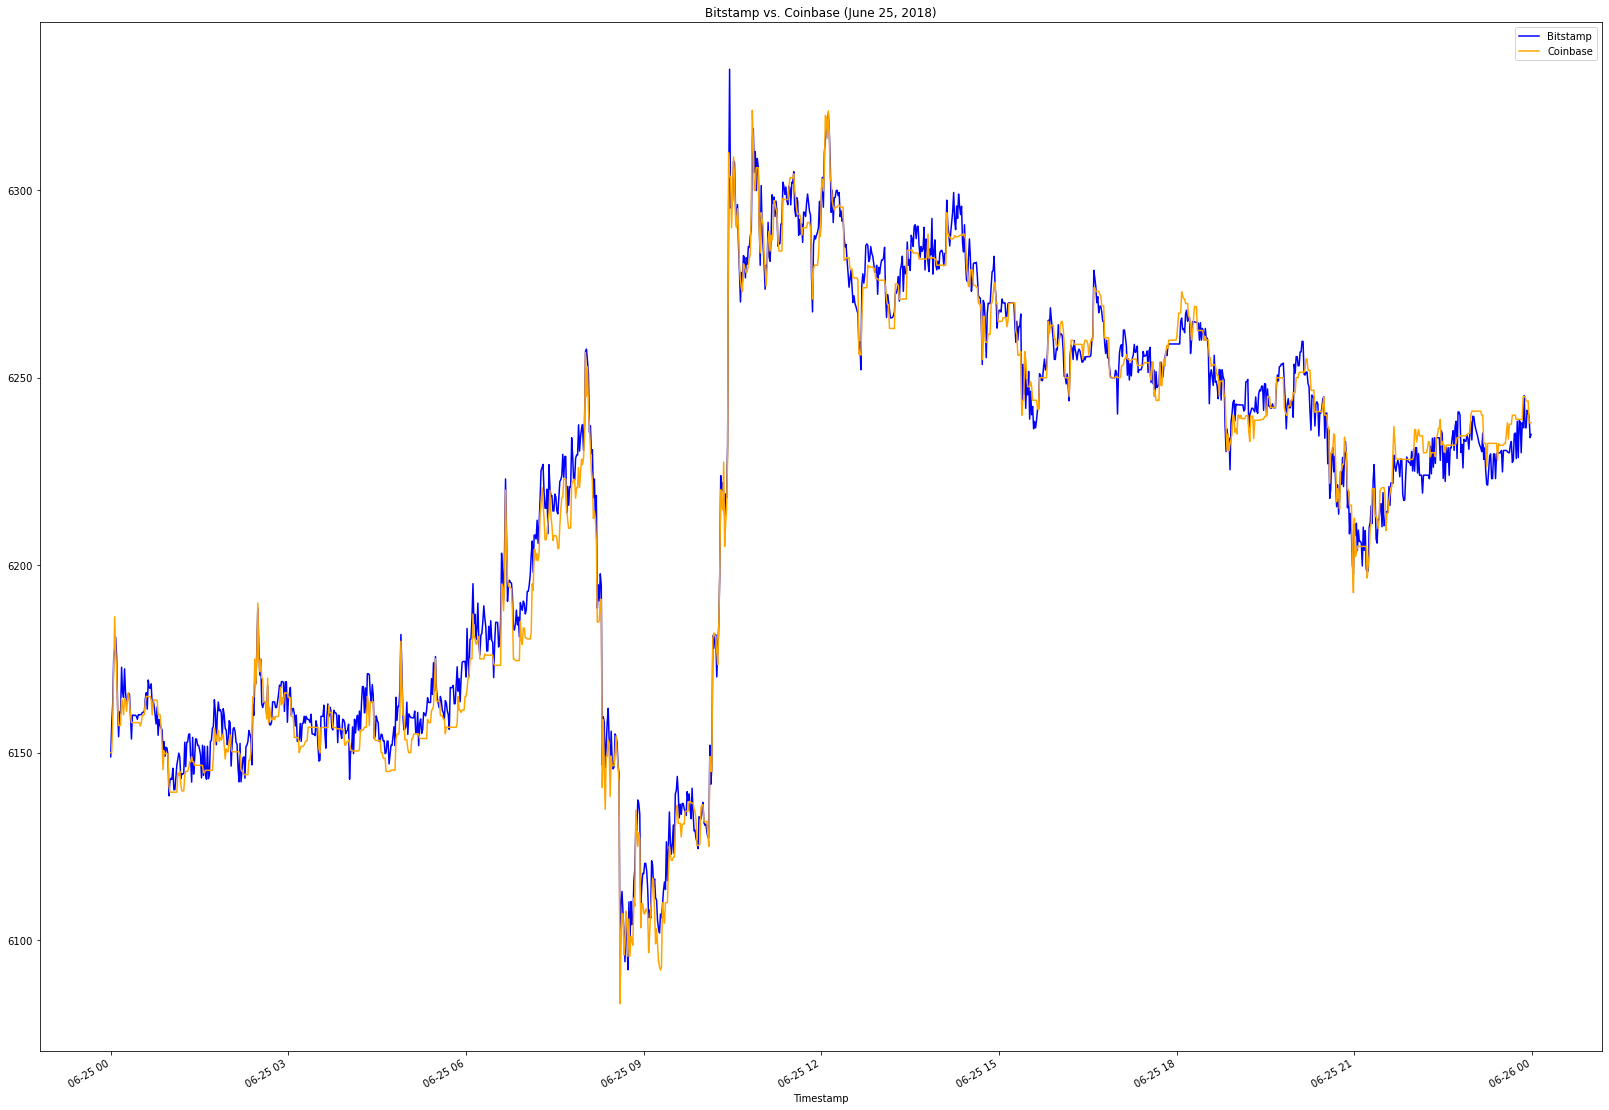

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc["2018-06-25"].plot(legend= True, figsize = (28,21), title = "Bitstamp vs. Coinbase (June 25, 2018)", color = "blue", label = "Bitstamp")
coinbase_sliced['Close'].loc["2018-06-25"].plot(legend= True, figsize = (28,21), color = "orange", label = "Coinbase")

In [30]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced['Close'].loc["2018-06-25"] - coinbase_sliced['Close'].loc["2018-06-25"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean        1.718490
std         5.290517
min       -15.280000
25%        -1.640000
50%         1.940000
75%         5.370000
max        28.680000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp/Coinbase Arbitrage Spread 6-25-2018'}>

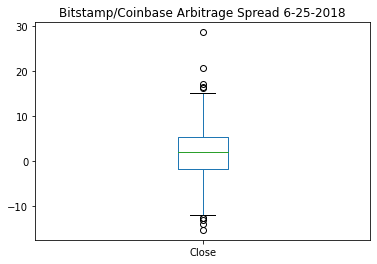

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(kind = "box", title = "Bitstamp/Coinbase Arbitrage Spread 6-25-2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc["2016-06-02"] - bitstamp_sliced['Close'].loc["2016-06-02"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    519.000000
mean       0.844817
std        0.618566
min        0.010000
25%        0.360000
50%        0.710000
75%        1.230000
max        3.440000
Name: Close, dtype: float64

In [33]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced['Close'].loc["2017-06-12"] - bitstamp_sliced['Close'].loc["2017-06-12"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    1046.000000
mean       26.845707
std        22.178162
min         0.010000
25%         8.322500
50%        22.260000
75%        38.250000
max       129.190000
Name: Close, dtype: float64

In [34]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp_sliced['Close'].loc["2018-06-25"] - coinbase_sliced['Close'].loc["2018-06-25"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    895.000000
mean       4.953810
std        3.422122
min        0.010000
25%        2.215000
50%        4.320000
75%        7.205000
max       28.680000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [35]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced['Close'].loc["2016-06-02"]

# Review the spread return DataFrame
spread_return_early.dropna()

Timestamp
2016-06-02 02:32:00    0.001060
2016-06-02 02:33:00    0.000540
2016-06-02 02:46:00    0.001563
2016-06-02 02:50:00    0.000446
2016-06-02 02:51:00    0.001377
                         ...   
2016-06-02 23:54:00    0.001136
2016-06-02 23:55:00    0.001118
2016-06-02 23:56:00    0.001248
2016-06-02 23:58:00    0.002723
2016-06-02 23:59:00    0.001434
Name: Close, Length: 519, dtype: float64

In [36]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced['Close'].loc["2017-06-12"]

# Review the spread return DataFrame
spread_return_middle.dropna()

Timestamp
2017-06-12 00:00:00    0.010044
2017-06-12 00:01:00    0.010020
2017-06-12 00:02:00    0.008568
2017-06-12 00:03:00    0.008609
2017-06-12 00:05:00    0.010221
                         ...   
2017-06-12 23:26:00    0.000143
2017-06-12 23:27:00    0.000143
2017-06-12 23:30:00    0.001442
2017-06-12 23:31:00    0.000335
2017-06-12 23:32:00    0.000301
Name: Close, Length: 1046, dtype: float64

In [37]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced['Close'].loc["2018-06-25"]

# Review the spread return DataFrame
spread_return_late.dropna()

Timestamp
2018-06-25 00:01:00    0.001236
2018-06-25 00:02:00    0.000789
2018-06-25 00:03:00    0.000365
2018-06-25 00:05:00    0.000512
2018-06-25 00:06:00    0.000716
                         ...   
2018-06-25 22:47:00    0.000882
2018-06-25 22:57:00    0.000030
2018-06-25 23:25:00    0.000323
2018-06-25 23:52:00    0.000051
2018-06-25 23:57:00    0.000298
Name: Close, Length: 895, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [38]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Series([], Name: Close, dtype: float64)

In [39]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2017-06-12 00:00:00    0.010044
2017-06-12 00:01:00    0.010020
2017-06-12 00:05:00    0.010221
2017-06-12 00:16:00    0.010358
2017-06-12 00:17:00    0.010361
Name: Close, dtype: float64

In [40]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [45]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [46]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    423.000000
mean       0.017537
std        0.006624
min        0.010012
25%        0.011870
50%        0.015260
75%        0.022147
max        0.047724
Name: Close, dtype: float64

In [47]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [48]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2016-06-02']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Series([], Name: Close, dtype: float64)

In [49]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2017-06-12']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Timestamp
2017-06-12 00:00:00    29.72
2017-06-12 00:01:00    29.65
2017-06-12 00:05:00    30.25
2017-06-12 00:16:00    30.67
2017-06-12 00:17:00    30.68
                       ...  
2017-06-12 14:28:00    35.56
2017-06-12 14:29:00    41.16
2017-06-12 14:38:00    27.90
2017-06-12 14:39:00    29.80
2017-06-12 14:55:00    28.00
Name: Close, Length: 423, dtype: float64

In [50]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-06-25']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early-Period Profitable Trades'}, xlabel='Timestamp'>

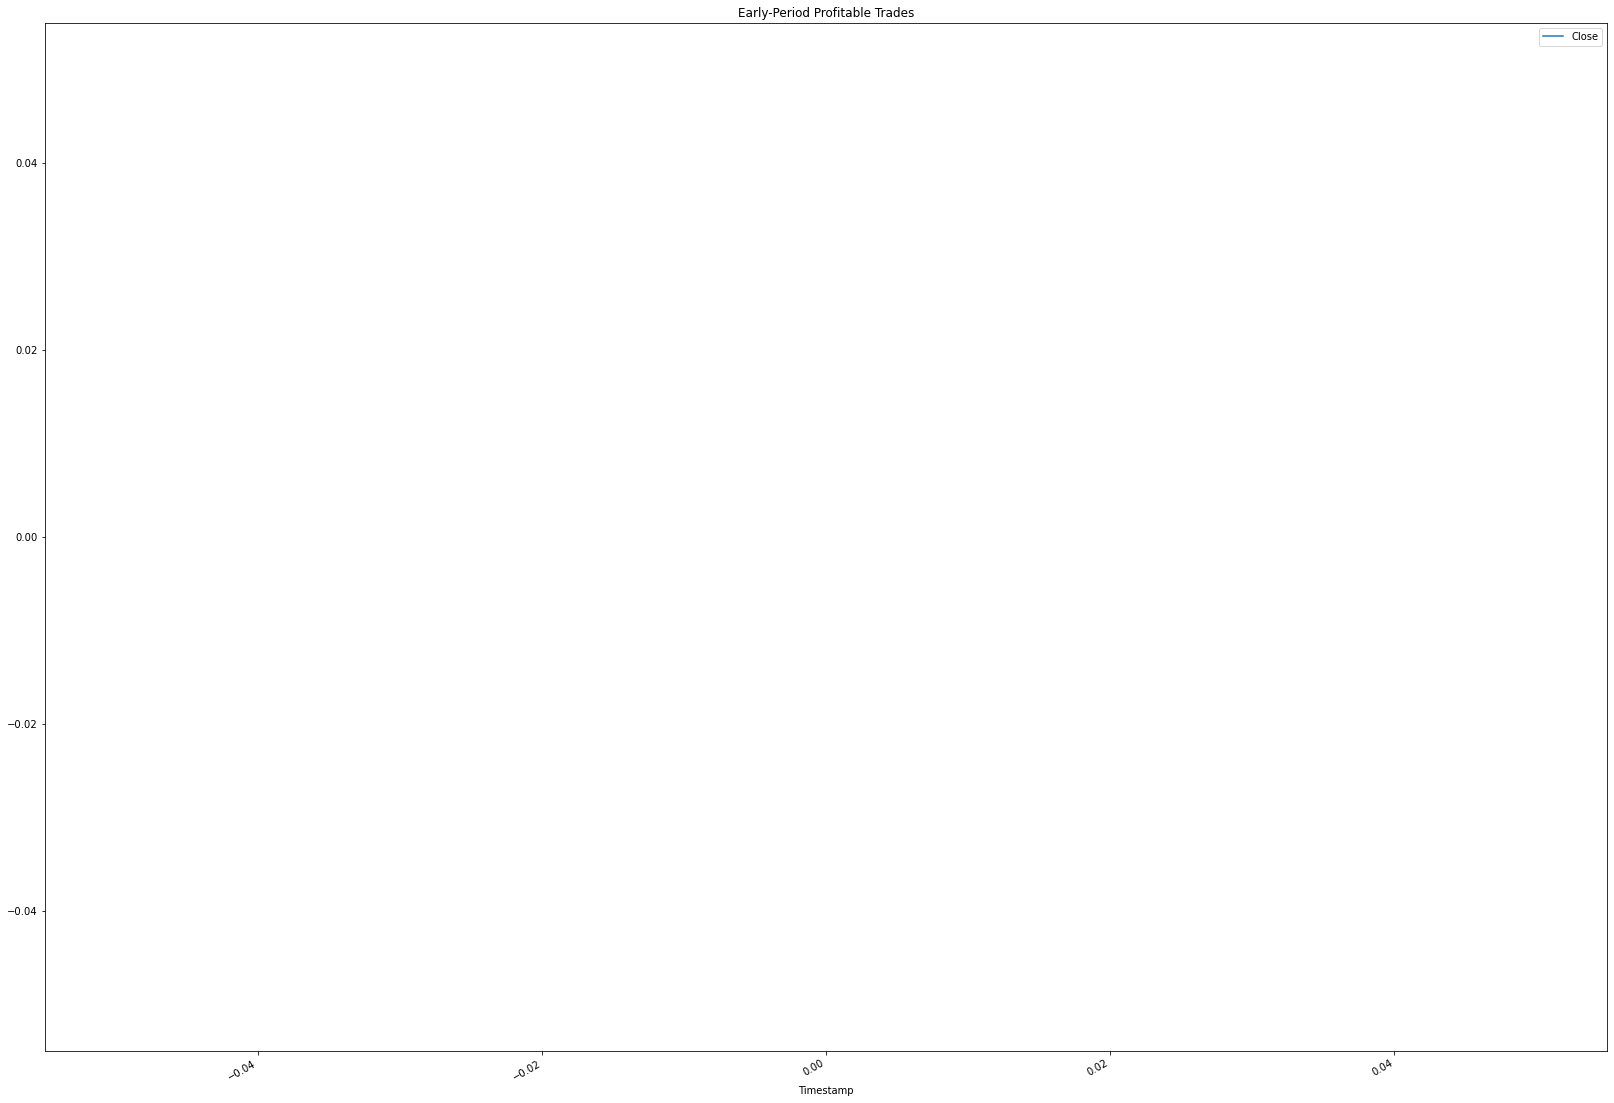

In [52]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(legend = True, figsize = (28, 21), title = "Early-Period Profitable Trades")

In [53]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    423.000000
mean      48.591277
std       17.987226
min       26.420000
25%       33.520000
50%       42.310000
75%       61.245000
max      129.190000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Mid-Period Profitable Trades'}, xlabel='Timestamp'>

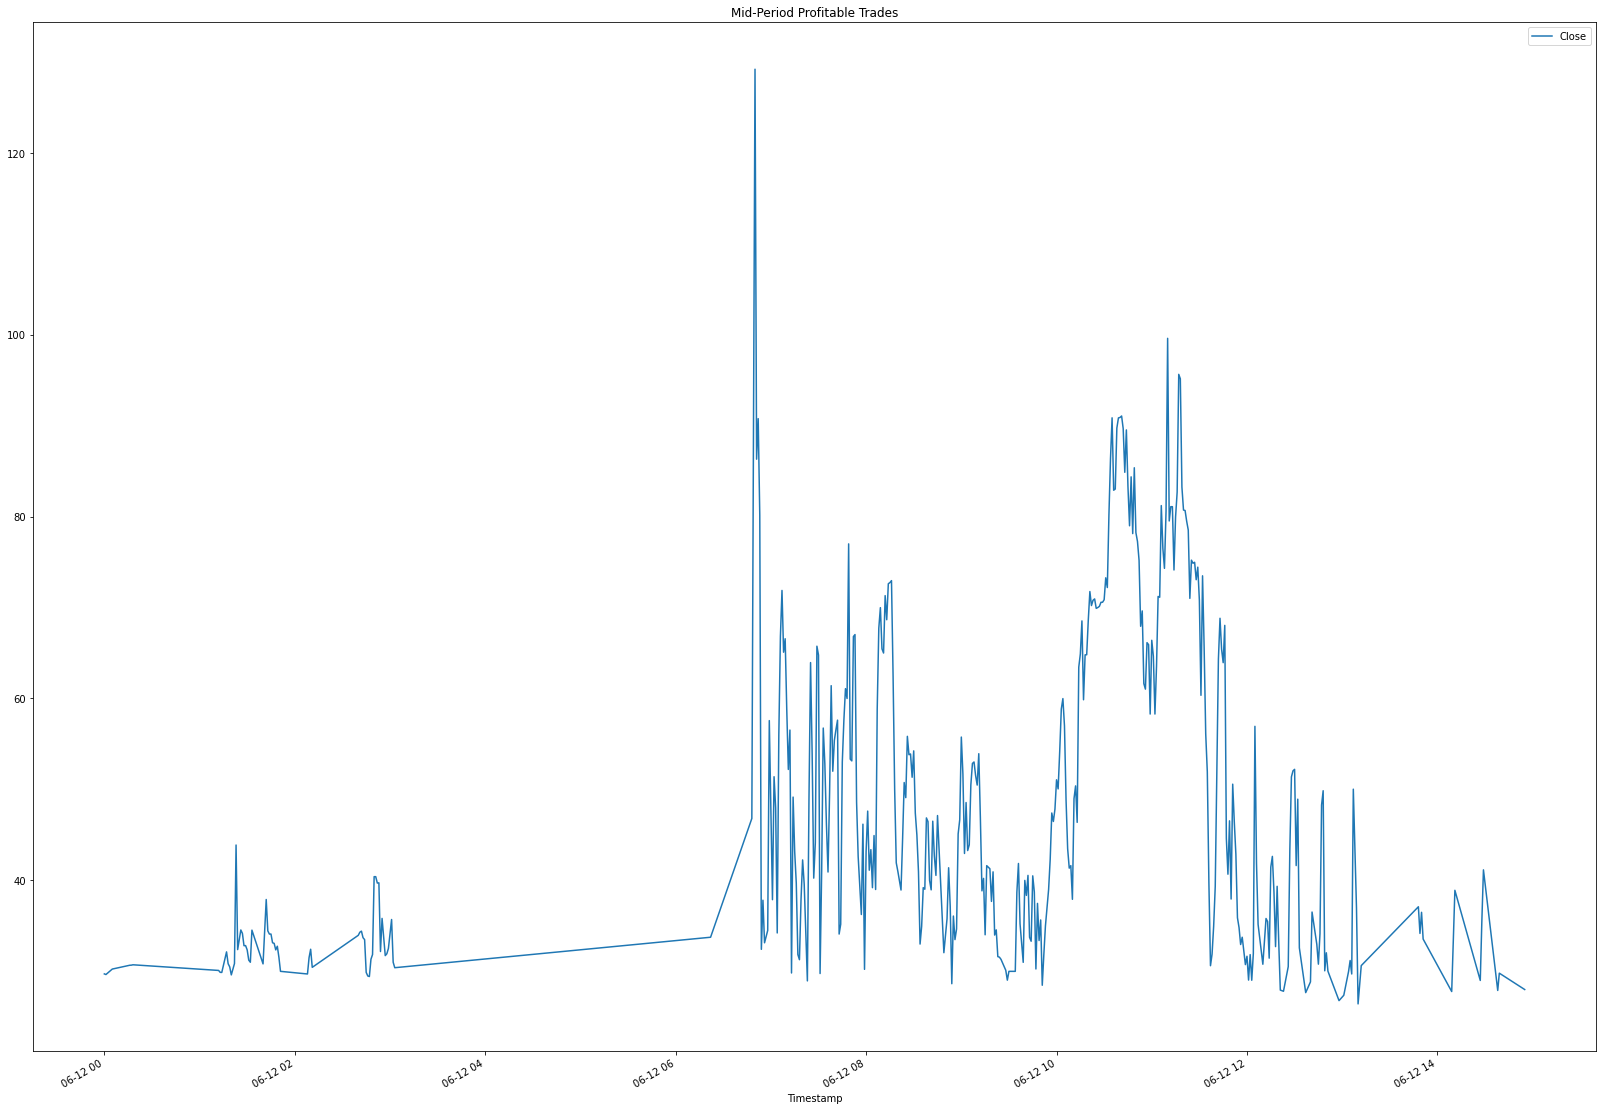

In [54]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(legend = True, figsize = (28, 21), title = "Mid-Period Profitable Trades")

In [55]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late-Period Profitable Trades'}, xlabel='Timestamp'>

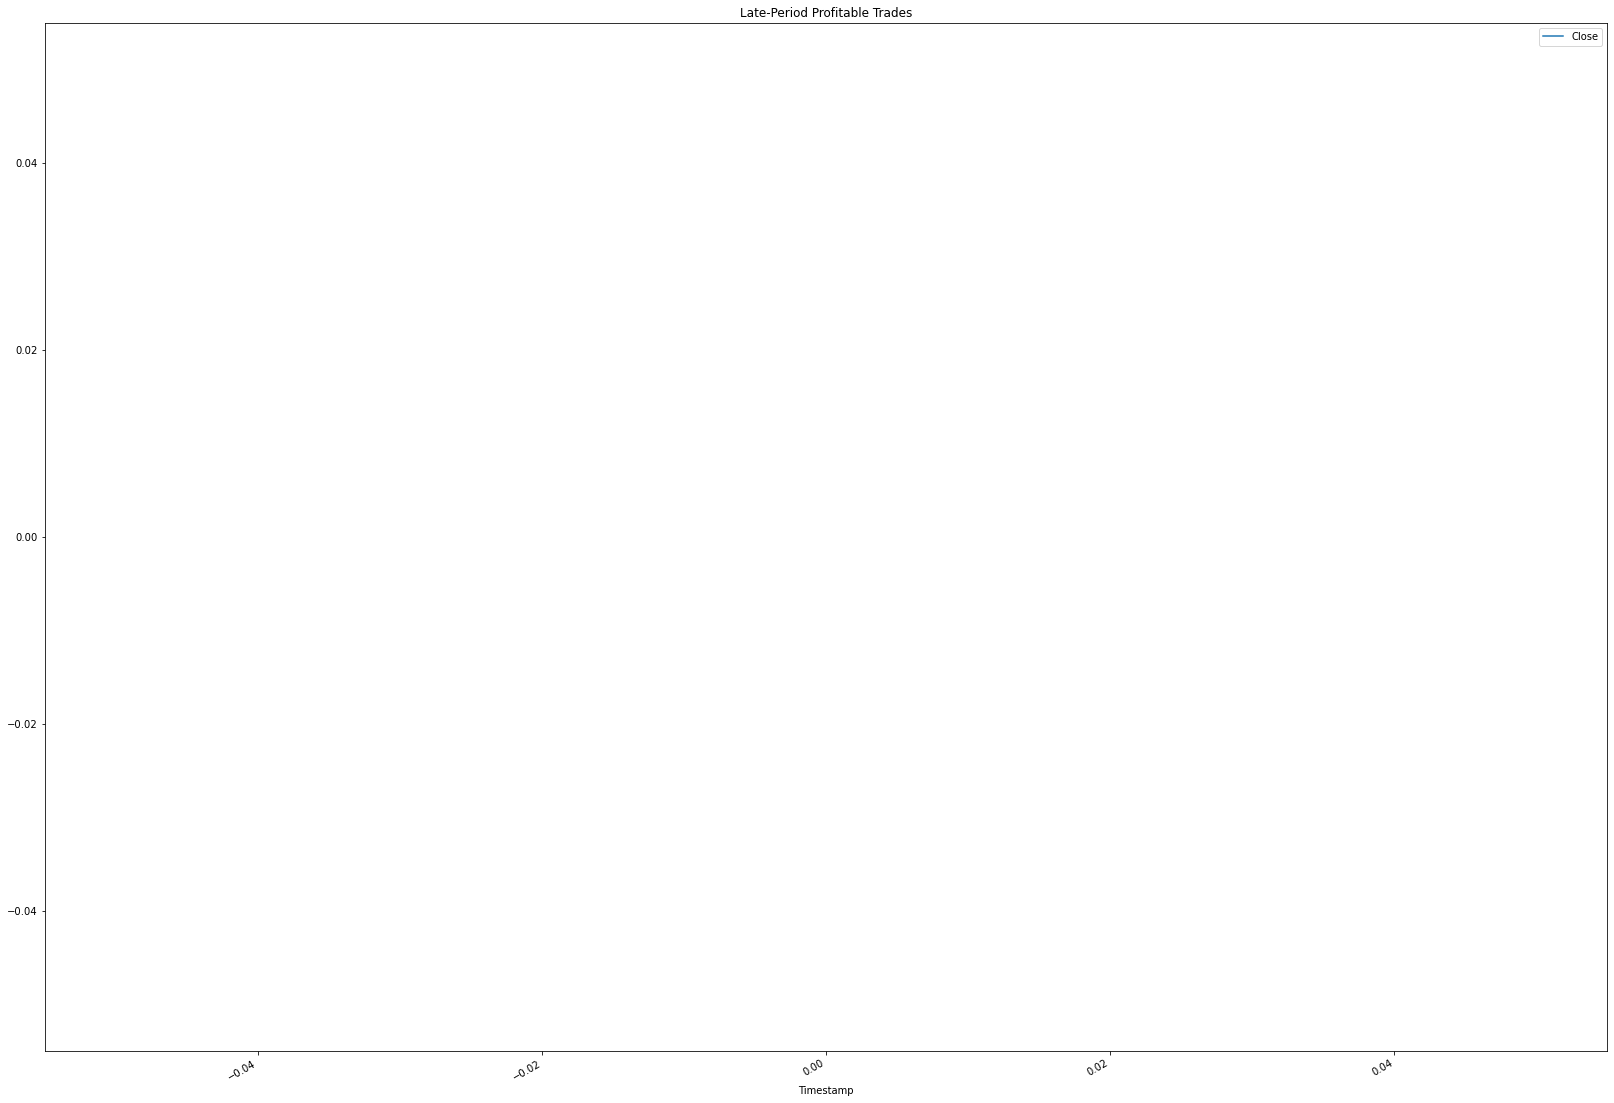

In [56]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(legend = True, figsize = (28, 21), title = "Late-Period Profitable Trades")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [57]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
round(profit_sum_early, 2)

0.0

In [58]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
round(profit_sum_middle, 2)

20554.11

In [59]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
round(profit_sum_late, 2)

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [60]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cumulative Profits for June 2, 2016'}, xlabel='Timestamp'>

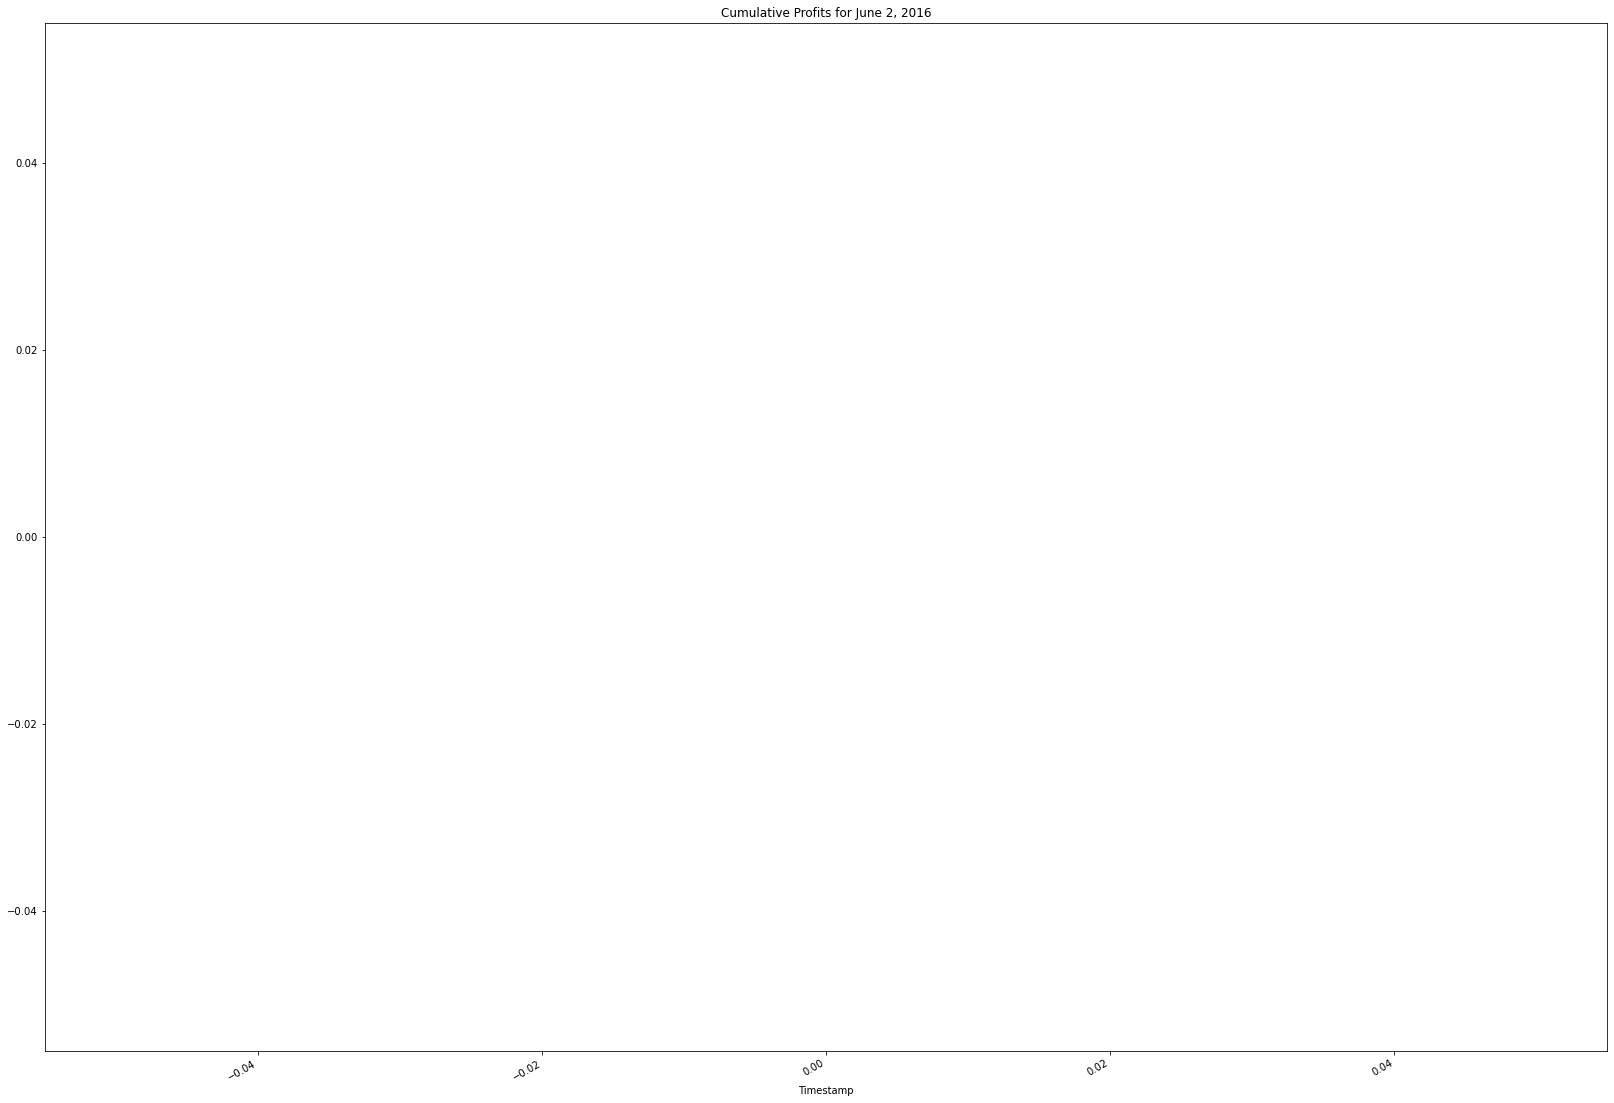

In [61]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize = (28, 21), title = "Cumulative Profits for June 2, 2016")

In [62]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


<AxesSubplot:title={'center':'Cumulative Profits for June 12, 2017'}, xlabel='Timestamp'>

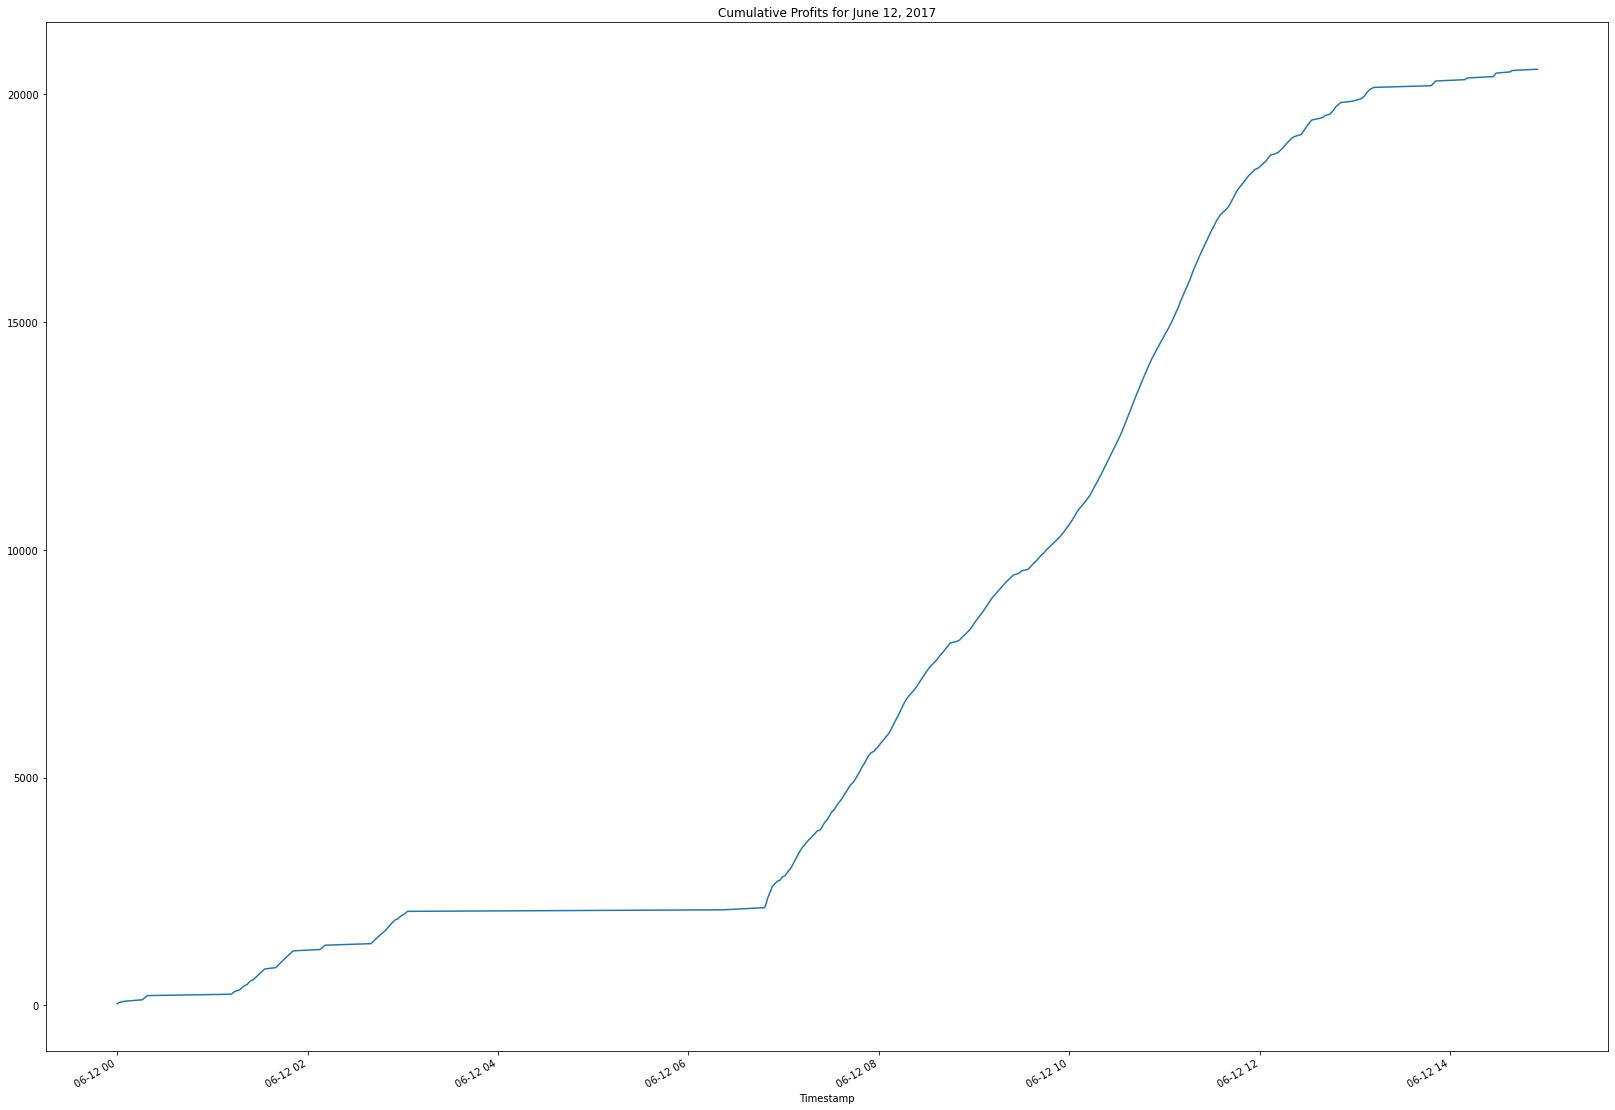

In [63]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize = (28, 21), title = "Cumulative Profits for June 12, 2017")

In [64]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Profits for June 25, 2018'}, xlabel='Timestamp'>

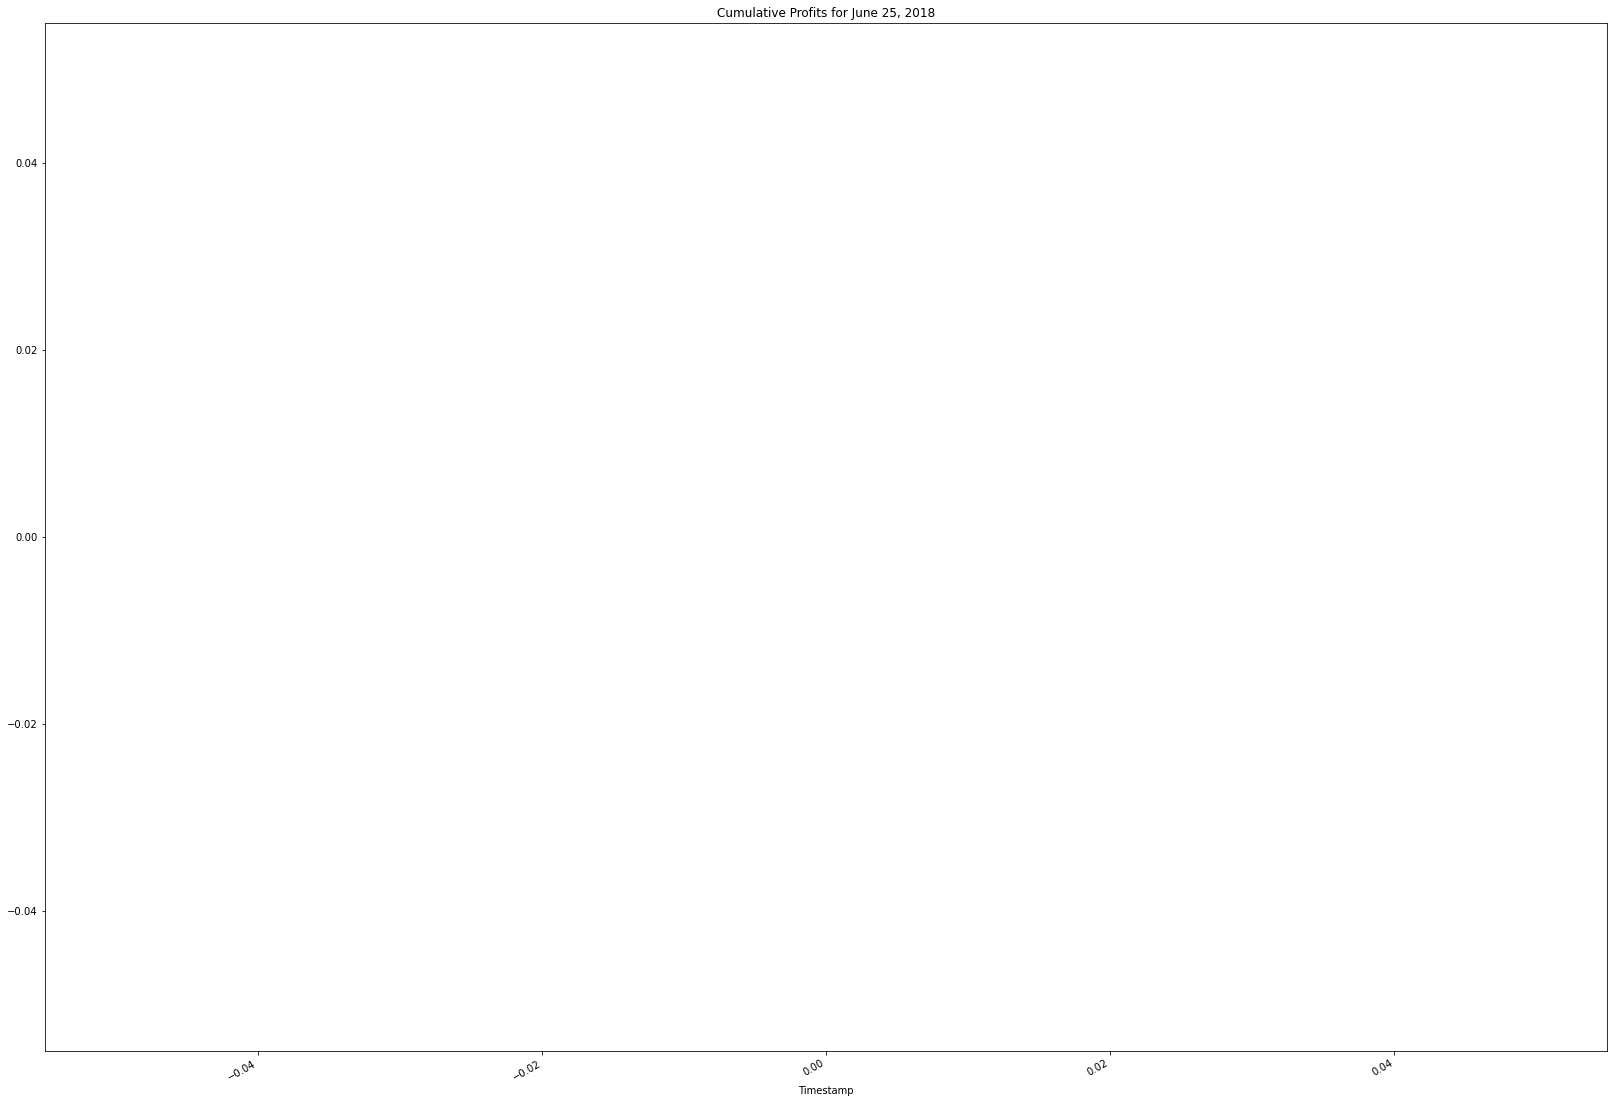

In [65]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize = (28, 21), title = "Cumulative Profits for June 25, 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The spread returns were very minimal for Bitcoin in the early period.  However, as the spread returns increased in the middle period, there were many profitable opportunities to be made.  Yet due to the increase of people taking advantage of the arbitrage, the spread returns (and thus profitability) were again very minimal because people buying the lower priced markets would drive Bitcoin prices up, while people selling in the higher priced markets would drive Bitcoin prices down.  Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.